In [1]:
# Predicting Survival in the Titanic Data Set

# We will be using a decision tree to make predictions about the Titanic data set from
# Kaggle. This data set provides information on the Titanic passengers and can be used to
# predict whether a passenger survived or not.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [3]:
url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

In [4]:
titanic = pd.read_csv(url)

In [5]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

In [7]:
# data type of each column
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
titanic.isnull().sum(axis=0) # sum by column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Statistics of central tendency and variability
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# The numbers of survived and dead
titanic.groupby(titanic['Survived']).count()['PassengerId']

Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [11]:
# PClass

In [14]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [15]:
titanic[["Survived"]].groupby(titanic["Pclass"]).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


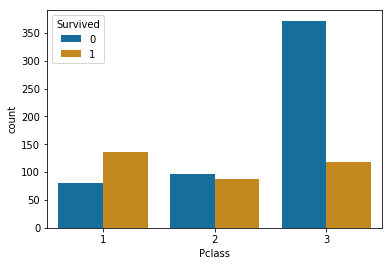

In [16]:
import seaborn as sns
sns.countplot(titanic["Pclass"],hue=titanic["Survived"],palette="colorblind")

In [17]:
# Sex

In [18]:
crosstab = pd.crosstab(titanic["Sex"],titanic["Survived"])
crosstab/crosstab.sum(axis=0)

Survived,0,1
Sex,,
female,0.147541,0.681287
male,0.852459,0.318713


In [19]:
titanic.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

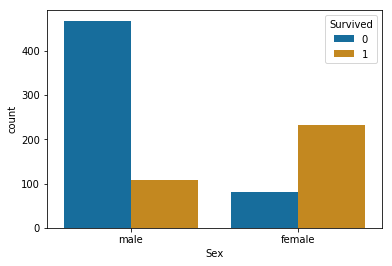

In [20]:
sns.countplot(titanic["Sex"],hue=titanic["Survived"],palette="colorblind")

In [ ]:
# Age

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


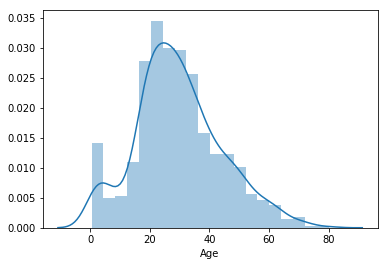

In [21]:
sns.distplot(titanic["Age"].dropna())

In [ ]:
facet = sns.FacetGrid(titanic, hue="Survived",aspect=2)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic['Age'].max()))
facet.add_legend()

In [22]:
titanic[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()

,Age,Survived
0,0.42,1.000000
1,0.67,1.000000
2,0.75,1.000000
3,0.83,1.000000
4,0.92,1.000000
5,1.00,0.714286
6,2.00,0.300000
7,3.00,0.833333
8,4.00,0.700000
9,5.00,1.000000


In [ ]:
# SibSp

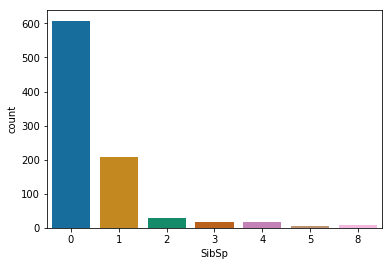

In [23]:
sns.countplot(titanic["SibSp"],palette="colorblind")

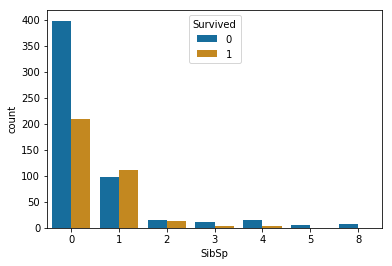

In [24]:
sns.countplot(titanic["SibSp"],hue=titanic["Survived"],palette="colorblind")

In [25]:
titanic[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
# Parch

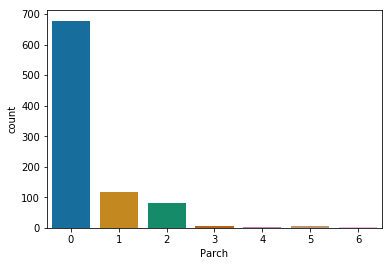

In [26]:
sns.countplot(titanic["Parch"],palette="colorblind")

In [27]:
titanic["Parch"].value_counts(ascending=False)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

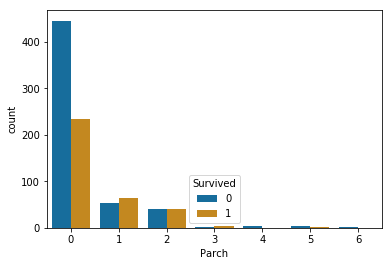

In [28]:
sns.countplot(titanic["Parch"],hue=titanic["Survived"],palette="colorblind")

In [29]:
titanic[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='SibSp', ascending=True)

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [30]:
# Fare

In [31]:
titanic["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


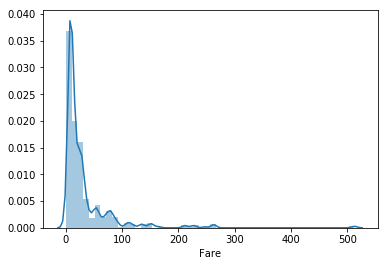

In [32]:
sns.distplot(titanic["Fare"])

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


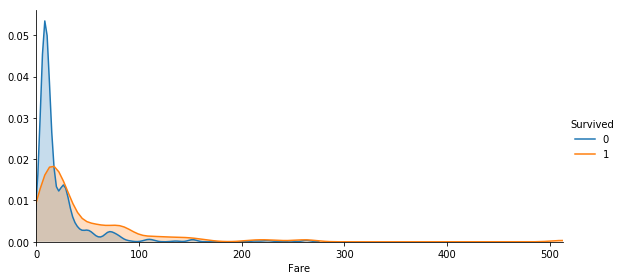

In [33]:
facet = sns.FacetGrid(titanic, hue="Survived",aspect=2,size=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, titanic['Fare'].max()))
facet.add_legend()

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


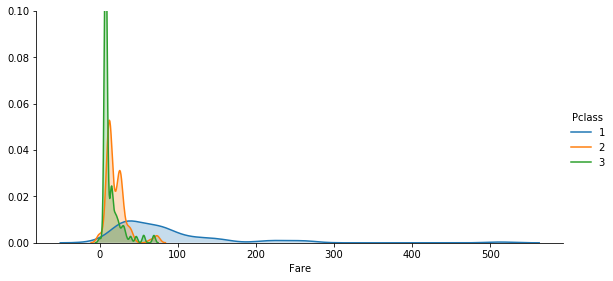

In [34]:
facet = sns.FacetGrid(titanic, hue="Pclass",aspect=2,size=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(ylim=(0, 0.1))
facet.add_legend()

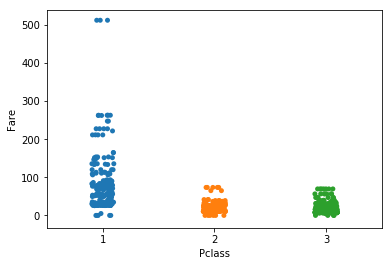

In [35]:
sns.stripplot(titanic["Pclass"], titanic["Fare"])

In [36]:
titanic["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

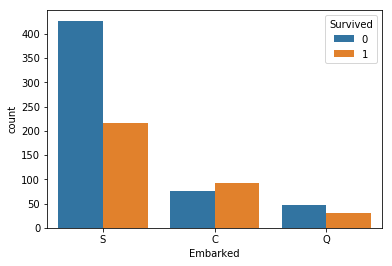

In [37]:
sns.countplot(titanic["Embarked"], hue=titanic["Survived"])

In [38]:
titanic[["Embarked", "Survived"]].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [43]:
feature_numeric = []
for column in titanic.columns:
    if titanic[column].dtypes != "object":
        feature_numeric.append(column)

feature_numeric

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [44]:
feature_numeric[:5]

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp']

In [45]:
# remove id and target
feature_numeric = [e for e in feature_numeric if e not in ('PassengerId', 'Survived', 'survived')]
feature_numeric

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [46]:
len(feature_numeric)

5

In [47]:
feature_numeric[:5]

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [48]:
df_numeric = titanic[feature_numeric[:5]]

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), \
                         index=df_numeric.index, columns=df_numeric.columns)

df_scaled = df_scaled.rename(columns={"Pclass": "pclass_scl", "SibSp": "sibsp_scl", \
                                      "Parch": "parch_scl", "Fare": "fare_scl", \
                                      "age": "age_scl"})

df_scaled.describe()

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,pclass_scl,Age,sibsp_scl,parch_scl,fare_scl
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.654321,0.367921,0.065376,0.063599,0.062858
std,0.418036,0.182540,0.137843,0.134343,0.096995
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.247612,0.000000,0.000000,0.015440
50%,1.000000,0.346569,0.000000,0.000000,0.028213
75%,1.000000,0.472229,0.125000,0.000000,0.060508
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
df = [titanic, df_scaled]
df = pd.concat(df, axis=1, join='inner')
# how to merge two dataframes: https://pandas.pydata.org/pandas-docs/stable/merging.html

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,pclass_scl,Age,sibsp_scl,parch_scl,fare_scl
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.654321,0.367921,0.065376,0.063599,0.062858
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.418036,0.182540,0.137843,0.134343,0.096995
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.500000,0.247612,0.000000,0.000000,0.015440
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.346569,0.000000,0.000000,0.028213
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,0.472229,0.125000,0.000000,0.060508
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
pclass_scl     float64
Age            float64
sibsp_scl      float64
parch_scl      float64
fare_scl       float64
dtype: object

In [71]:
label = titanic['Survived'].values        #target
features = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]    #data set

In [72]:
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [73]:
features_dummies = pd.get_dummies(features, columns=['Pclass', 'Sex'])     #
features_dummies.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,22.0,1,0,7.2500,0,0,1,0,1
1,38.0,1,0,71.2833,1,0,0,1,0
2,26.0,0,0,7.9250,0,0,1,1,0
3,35.0,1,0,53.1000,1,0,0,1,0
4,35.0,0,0,8.0500,0,0,1,0,1


In [75]:
data = features_dummies.values
data

array([[22.,  1.,  0., ...,  1.,  0.,  1.],
       [38.,  1.,  0., ...,  0.,  1.,  0.],
       [26.,  0.,  0., ...,  1.,  1.,  0.],
       ...,
       [nan,  1.,  2., ...,  1.,  1.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       [32.,  0.,  0., ...,  1.,  0.,  1.]])

In [76]:
x_train, x_test, y_train, y_test = train_test_split(data, label, 
                                                    test_size = 0.25,
                                                    random_state = 42,
                                                    stratify=label)

In [83]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

In [84]:
pipe = make_pipeline(SimpleImputer(),                        #preprocessing
                    StandardScaler(),                  #preprocessing
                    DecisionTreeClassifier())          #estimator

cv = StratifiedKFold(n_splits=10, random_state=42)        #cross validation

param_grid = {'decisiontreeclassifier__criterion': ['gini', 'entropy'],
              'decisiontreeclassifier__max_depth': [3, 5, 7, 9, 13]}

grid = GridSearchCV(pipe, param_grid, cv=cv)

In [85]:
grid.fit(x_train, y_train)          #training

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=False),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('simpleimputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose=0)), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('decisiontreeclassifier', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=N...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'decisiontreeclassifier__criterion': ['gini', 'entropy'], 'decisiontreeclassifier__max_depth': [3, 5, 7, 9, 13]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [86]:
grid.score(x_test, y_test)       #accuracy of model

0.7713004484304933